# Clustering

One of the main goals of the project is to apply clusttring to our dataset to detect the class of each row.

Firstly we are ginig to read the data and remove the class labels because clustring is an unsopervised learning method which dosen't  have a predifend class.

In [36]:
import pandas as pd
# Load the data set from  students.csv
df =pd.read_csv('Processed_dataset.csv')

In [42]:
# Remove the class labels.
# Extract the features (excluding the target variable, if any).
features= df.drop(df.columns[0], axis=1) 

We start to scaling the feature to have the same unnite beacuse K-means algorithm is sensitive to feature scales.

In [43]:
from sklearn.preprocessing import scale
# Scale the variable if needed.
# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [44]:
# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
         id  concave points_worst  perimeter_worst  perimeter_mean  \
0 -0.242572             -1.269231          -0.8446       -0.966879   
1 -0.242938             -1.269231          -0.8446       -0.966879   
2 -0.250045             -1.269231          -0.8446       -0.966879   
3 -0.242477             -1.269231          -0.8446       -0.966879   
4 -0.242899             -1.269231          -0.8446       -0.966879   

   radius_worst  radius_mean  concave points_mean  concavity_mean  area_mean  \
0      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
1      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
2      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
3      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
4      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   

   compactness_mean  concavity_worst  
0         -0.695781        -0.628342  
1

We apply K-means clustering using three different sizes of K which is 2 ,4 ,5.
*  K=2 beacuse it's the most common and general number of grop in the domain of cancer.
* K=4 & K=5 following the number of stages of breast cancer by the "TNM" system which has been declared as 4 in some sources and 5 in others.ead)

The result of follwing code shows the cordinates of each cluster when K=2 ,4 and 5 follwing up with the assign cluster to each data point.

In [47]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
#5) Build the K-means model
# Set a seed for random number generation
np.random.seed(8953)

# Define different values of K
k_values = [2, 4, 5]  # Example: using 2, 4, and 5 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled)

    # Print the clustering result for the current value of K
    print(f"Cluster Centers (K={k}):")
    print(kmeans_result.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans_result.labels_)
    print("\n")

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=2):
[[-0.13244141 -0.56697613 -0.71798932 -0.66193337 -0.6707933  -0.65272693
  -0.67092297 -0.54020123 -0.62855966 -0.43966985 -0.37619595]
 [ 0.17923738  0.76730769  0.97167888  0.8958165   0.90780693  0.88335711
   0.90798242  0.73107233  0.85065074  0.59501986  0.50911851]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=4):
[[-0.13038334 -0.68401857 -0.84460049 -0.80341713 -0.82578595 -0.79137269
  -0.71654367 -0.62603623 -0.62855966 -0.50001792 -0.46491417]
 [-0.08482167  1.02840237  0.80296788  0.80272462  0.67831347  0.7519412
   1.10975491  1.24062741  0.64404038  1.25214239  1.12159751]
 [ 8.01849387  0.63153846  1.21156484  1.04081674  1.17749415  1.04096961
   0.5157518   1.05632976  1.31776982  0.02133052  0.12996485]
 [-0.12263307  0.12725275  0.8199143   0.73010193  0.9607812   0.77560163
   0.09550469 -0.36252278  0.51143332 -0.61894777 -0.52001285]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 1 3 1 1 1 0 3
 0 1 1 3 3 1 0 1 1 3 1 1 1 3 1 1 1 3 1 3 1 0 1 1 1 3 0 0 0 0 0 1 0 0 1 0 1
 3 3 3 1 0 0 3 1 0 3 1 1 1 1 3 0 1 0 

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=5):
[[-0.12598356  0.10731838  0.74987957  0.70620079  0.88720582  0.75013703
   0.11625764 -0.39571232  0.45273449 -0.57128261 -0.49669189]
 [-0.12663378 -0.76858173 -0.84460049 -0.81002771 -0.82409072 -0.7954974
  -0.77125496 -0.68612073 -0.62855966 -0.59493733 -0.59279681]
 [-0.10022496  1.03222326  1.11962249  1.0734622   1.08705026  1.03273202
   1.24121902  1.26882372  1.00920539  1.20631384  0.92063895]
 [ 8.01849387  0.63153846  1.21156484  1.04081674  1.17749415  1.04096961
   0.5157518   1.05632976  1.31776982  0.02133052  0.12996485]
 [-0.07475888  0.80723982 -0.49182702 -0.42558844 -0.79558518 -0.48879872
   0.31386838  0.85133558 -0.62855966  1.09699804  1.60197318]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1

To evaluate and represent the result from the previos cell using Silhouette coefficient.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


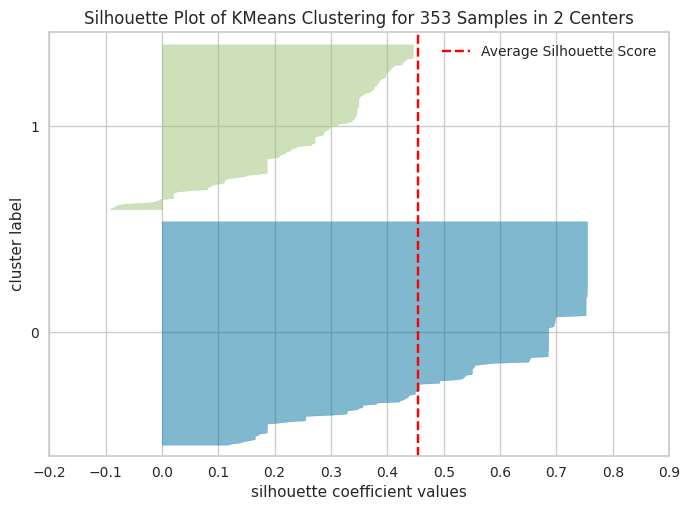

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


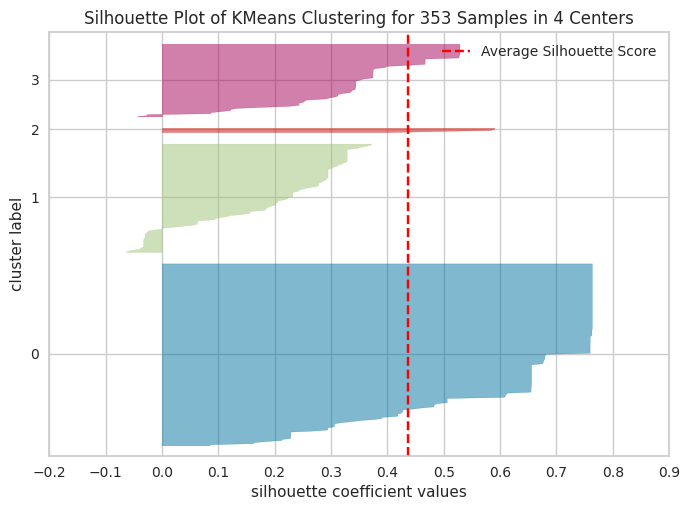

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


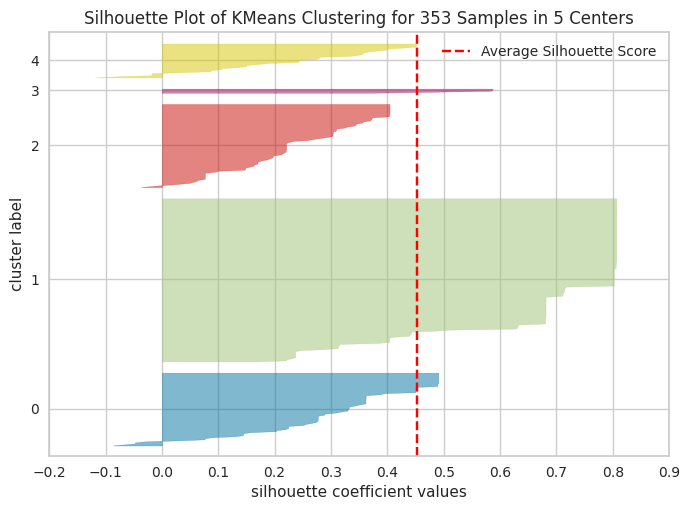

In [48]:
# Visual the model using (SilhouetteVisualizer)
%pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

# Define different values of K
k_values = [2, 4, 5]  # Example: using 2, 3, and 4 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled)

    # Visualize the clustering model with SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_scaled)
    visualizer.show()

The silhouette coefficient value which is represented by doted line help us to know which number of clustring is better. The higher the silhouette coefficient value the better number of clusters K.

* When K=2 silhouette coefficient value = 0.45.
* When K=4 silhouette coefficient value = 0.43.
* When K=5 silhouette coefficient value = 0.44.

Which means the best choice is K=2.

The second evaluation method used is Elbow method where the best nuber of cluster is the turning point in the curve.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

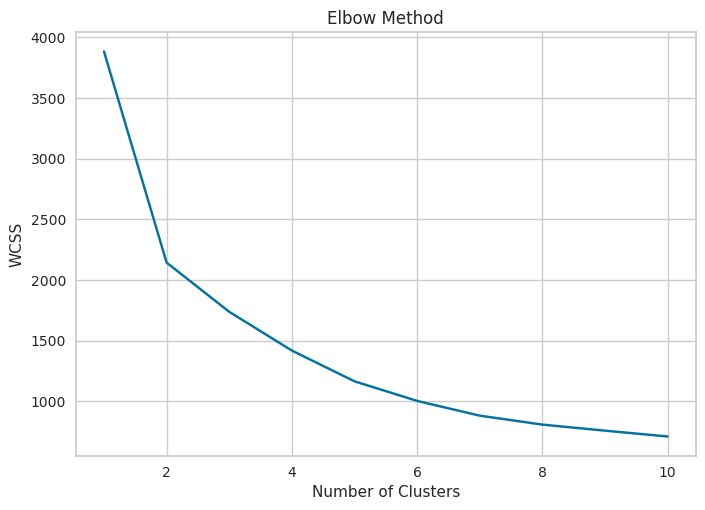

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_scaled is already defined and contains your scaled data

# Calculate the total within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):  # Try different values of k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=8953)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


After visually diplying the graph -which represent total within-cluster sum of square (WSS) with respect to K- we can clearly see tht the turning point is intersect with Number of cluster=2 Which means that the best number of cluster is 2 clusters.